In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform_pipeline = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

def fetch_rand_labels(train_size, test_size):
    train_data = datasets.MNIST('data', train=True, download=True, transform=transform_pipeline)
    test_data = datasets.MNIST('data', train=False, download=True, transform=transform_pipeline)

    random_labels = torch.randint(0, 10, (len(train_data),), dtype=torch.long)
    train_data.targets = random_labels

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_size, shuffle=True)

    return train_loader, test_loader


In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, 5)  # First conv layer: 1 input channel, 5 output channels
        self.conv2 = nn.Conv2d(5, 16, 5)  # Second conv layer: 5 input channels, 16 output channels
        self.fc1 = nn.Linear(16 * 5 * 5, 100)  # Fully connected: 16*5*5 to 100 units
        self.fc2 = nn.Linear(100, 84)  # Fully connected: 100 to 84 units
        self.fc3 = nn.Linear(84, 10)  # Output layer: 84 to 10 classes

    def forward(self, data):
        data = F.relu(self.conv1(data))  # Apply ReLU to conv1
        data = F.max_pool2d(data, 2)  # Max pooling (2x2)
        data = F.relu(self.conv2(data))  # Apply ReLU to conv2
        data = F.max_pool2d(data, 2)  # Max pooling (2x2)

        data = data.view(data.size(0), -1)  # Flatten the data
        data = F.relu(self.fc1(data))  # Apply ReLU to fc1
        data = F.relu(self.fc2(data))  # Apply ReLU to fc2
        output = self.fc3(data)  # Output layer

        return output


In [4]:
train_size = 100
test_size = 100
train_data_loader, test_data_loader = fetch_rand_labels(train_size, test_size)


In [5]:
def train_step(model, optimizer, loader):
    model.train()
    correct = 0
    total_loss = 0
    batch_count = 0

    for batch_idx, (inputs, targets) in enumerate(loader):
        batch_count += 1
        inputs, targets = Variable(inputs), Variable(targets)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predictions = np.argmax(outputs.detach().numpy(), axis=1)
        correct += np.sum(predictions == targets.detach().numpy())

    avg_loss = (total_loss * 100) / len(loader.dataset)
    accuracy = 100.0 * correct / len(loader.dataset)
    return avg_loss, accuracy


In [6]:
def test_step(model, epoch, loader):
    model.eval()
    total_loss = 0
    correct = 0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = Variable(inputs), Variable(targets)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item()
            predictions = np.argmax(outputs.detach().numpy(), axis=1)
            correct += np.sum(predictions == targets.detach().numpy())

    avg_loss = (total_loss * 100) / len(loader.dataset)
    accuracy = 100. * correct / len(loader.dataset)
    print(f'\nEpoch {epoch}, Average loss: {avg_loss:.5f}, Accuracy: {accuracy:.0f}%\n')
    return avg_loss


In [7]:
model = CNN()

optimizer = optim.Adam(model.parameters(), lr=0.0001)
train_loss_list = []
test_loss_list = []
epoch_list = []
num_epochs = 100
loss_fn = torch.nn.CrossEntropyLoss()

for epoch in range(1, num_epochs + 1):
    print(f'Training epoch - {epoch}')
    train_loss, train_acc = train_step(model, optimizer, train_data_loader)
    train_loss_list.append(train_loss)
    
    test_loss = test_step(model, epoch, test_data_loader)
    test_loss_list.append(test_loss)
    
    epoch_list.append(epoch)


Training epoch - 1

Epoch 1, Average loss: 2.29673, Accuracy: 14%

Training epoch - 2

Epoch 2, Average loss: 2.29630, Accuracy: 15%

Training epoch - 3

Epoch 3, Average loss: 2.29533, Accuracy: 13%

Training epoch - 4

Epoch 4, Average loss: 2.29578, Accuracy: 15%

Training epoch - 5

Epoch 5, Average loss: 2.29457, Accuracy: 16%

Training epoch - 6

Epoch 6, Average loss: 2.29490, Accuracy: 17%

Training epoch - 7

Epoch 7, Average loss: 2.29319, Accuracy: 16%

Training epoch - 8

Epoch 8, Average loss: 2.29449, Accuracy: 10%

Training epoch - 9

Epoch 9, Average loss: 2.29732, Accuracy: 16%

Training epoch - 10

Epoch 10, Average loss: 2.29662, Accuracy: 13%

Training epoch - 11

Epoch 11, Average loss: 2.30493, Accuracy: 12%

Training epoch - 12

Epoch 12, Average loss: 2.29524, Accuracy: 13%

Training epoch - 13

Epoch 13, Average loss: 2.29524, Accuracy: 14%

Training epoch - 14

Epoch 14, Average loss: 2.30170, Accuracy: 14%

Training epoch - 15

Epoch 15, Average loss: 2.30701

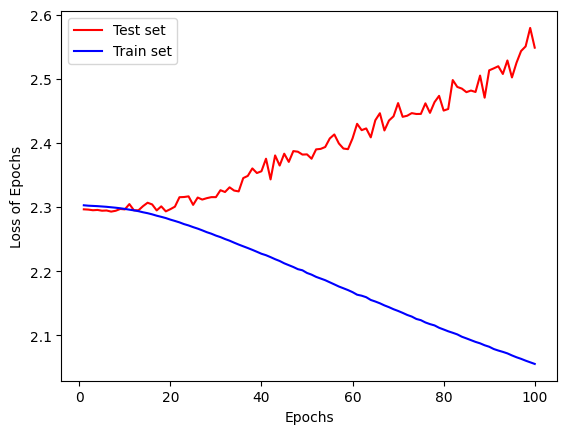

In [8]:
plt.plot(epoch_list, test_loss_list, color="red")
plt.plot(epoch_list, train_loss_list, color="blue")
plt.xlabel('Epochs')
plt.ylabel('Loss of Epochs')
plt.legend(['Test set', 'Train set'])
plt.show()


In [ ]:
model = Model()  # Initialize your model
param_count = sum(p.numel() for p in model.parameters())  # Calculate number of parameters
print(param_count)  # Print the total number of parameters
